# Uber Data Analysis


# importing library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the dataset

In [ ]:
df=pd.read_csv('/content/UberDataset.csv')

In [ ]:
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
#checking shape of dataset
df.shape

(1156, 7)

In [ ]:
#checking the columns datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


**observation:**-The dataset have certain columns which datatype is not proper and also have some columns that contain missing values in it
so we will have to do preprocessing on dataset

# Data Preprocessing

In [ ]:
# filling the nan values with 'not' in Purpose Columns
df['PURPOSE'].fillna('not',inplace=True)

In [ ]:
# changing the datatype of START_DATE	,END_DATE to date and time  type
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [ ]:
# checking the datatypew again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [ ]:
# now creating two more columns one date and second time
from datetime import datetime
df['DATE']=df['START_DATE'].dt.date
df['TIME']=df['START_DATE'].dt.hour

In [ ]:
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [ ]:
df['Day_Night']=pd.cut(df['TIME'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,Day_Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
 7   DATE        421 non-null    object        
 8   TIME        421 non-null    float64       
 9   Day_Night   414 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 82.7+ KB


In [ ]:

df['Month'] = df['START_DATE'].dt.month_name()



In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,Day_Night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,Morning,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   DATE        413 non-null    object        
 8   TIME        413 non-null    float64       
 9   Day_Night   413 non-null    category      
 10  Month       413 non-null    object        
dtypes: category(1), datetime64[ns](2), float64(2), object(6)
memory usage: 52.3+ KB


So we have done our preprocessing steps required for analysis
Preprocessing steps include:

1.   chaning the data-type of columns(start-time,End-time)
making two seprate columns date,time using pandas function
2. We have also created one more column day_night which give info about ride time and also removed the null values
also added few more columns depending upon our requirment in the dataset



#Data Visualization

Q1.In Which Category People book most number of  Uber Rides

Q2.For Which Puropse people book most number of ride

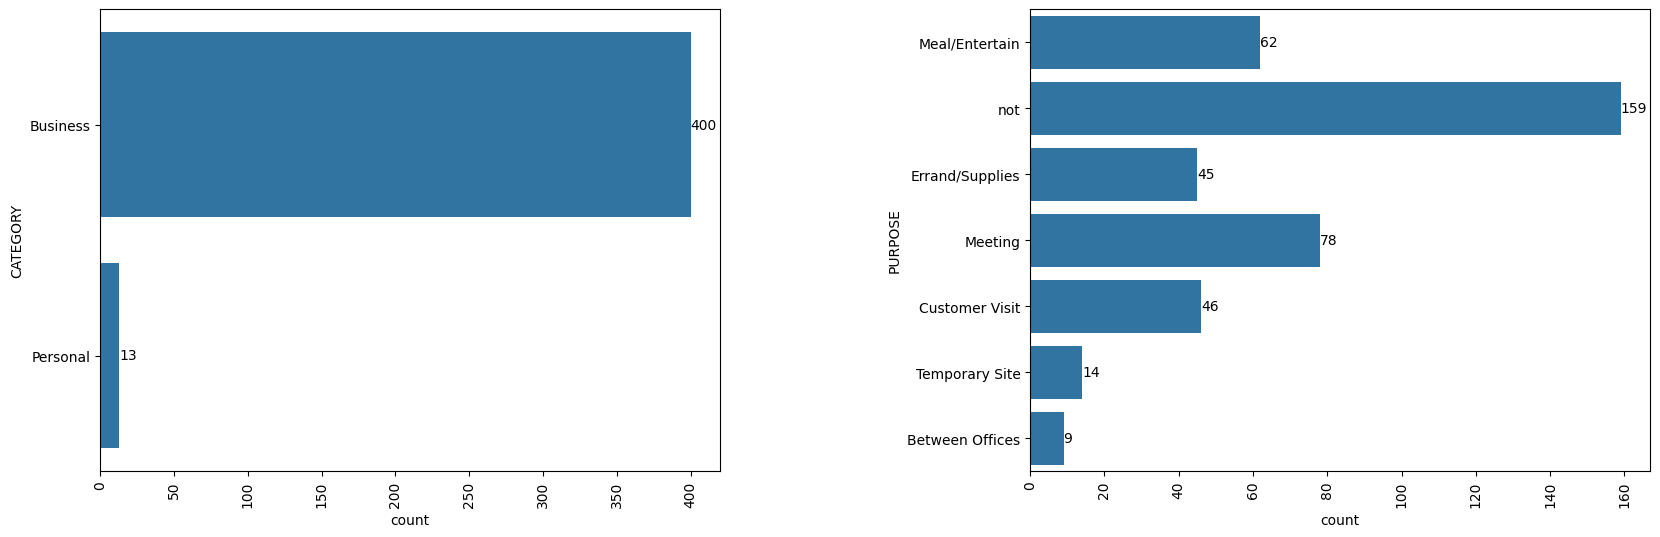

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.countplot(df['CATEGORY'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax=sns.countplot(df['PURPOSE'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)  # Adjust wspace for horizontal spacing
plt.show()

**observation:-** The fist graph show Business category people book most ride

The Second graph show  is people use ride for metting Purpose

Q3.At What time The People book the cab the most from uber


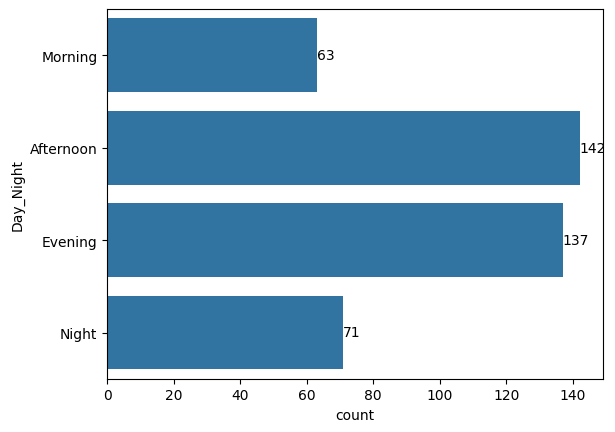

In [ ]:
ax=sns.countplot(df['Day_Night'])
ax.bar_label(ax.containers[0])
plt.show()

**Observation:=** So Most Number of  User book Uber Ride in Afternoon time and Evening Time

Q4. In which Month People Book uber rides Less frequently

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

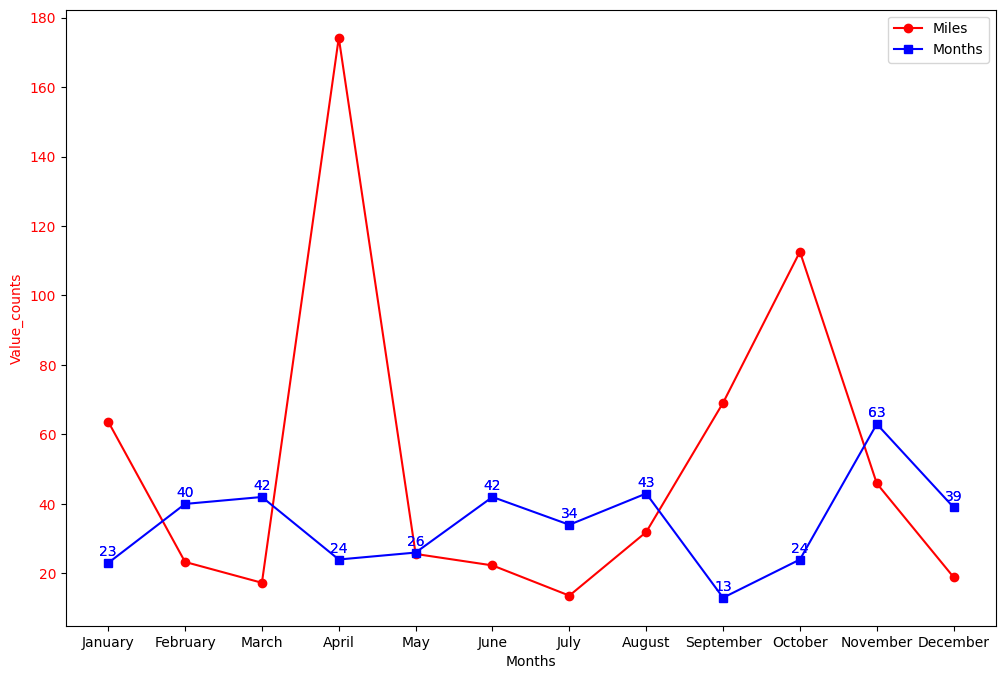

In [ ]:
monthly_max_miles = df.groupby('Month')['MILES'].agg(['max','count']).reset_index()
monthly_max_miles = monthly_max_miles.sort_values(by='Month') #Sort by 'Month' after reset_index
monthly_max_miles.columns = ['Month', 'MILES','Value_counts']

fig,ax1=plt.subplots(figsize=(12,8))
plt.plot(monthly_max_miles['Month'],monthly_max_miles['MILES'],marker='o',color='red',label='Miles')
for x, y in zip(monthly_max_miles['Month'], monthly_max_miles['Value_counts']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='blue')

ax1.set_ylabel('MILES',color='red')
ax1.tick_params(axis='y',labelcolor='red')


plt.plot(monthly_max_miles['Month'],monthly_max_miles['Value_counts'],color='blue',label='Months',marker='s')
for x, y in zip(monthly_max_miles['Month'], monthly_max_miles['Value_counts']):
    plt.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', color='blue')

plt.xlabel("Months")
plt.ylabel("Value_counts")
plt.legend()
plt.show()



In [ ]:
# Group data and calculate maximum miles and ride counts
monthly_data = df.groupby('Month')['MILES'].agg(['max', 'count']).reset_index()
monthly_data.columns = ['Month', 'MaxMiles', 'RideCount']

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Month', y='RideCount', data=monthly_data, color='skyblue')
ax2 = ax.twinx()  # Create a secondary y-axis
ax2.plot(monthly_data['Month'], monthly_data['MaxMiles'], marker='o', color='red', label='Max Miles')

# Add annotations for ride counts
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and titles
ax.set_xlabel('Month')
ax.set_ylabel('Ride Count', color='blue')
ax2.set_ylabel('Max Miles', color='red')
plt.title('Monthly Uber Ride Statistics')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**observation:=** so in Month of January& fabruray and in NOV &
 Dec uber-rides are less ..The reason for this may be due to winter sesssion

Q5.On which day of the week people book uber rides the most

In [ ]:
df['DAY']=df.START_DATE.dt.day_of_week
data_label={
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}
df['DAY_Name']=df['DAY'].map(data_label)

In [ ]:
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,Day_Night,Month,DAY,DAY_Name
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,January,4,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,not,2016-01-02,1.0,Morning,January,5,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,January,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,January,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January,2,Wednesday


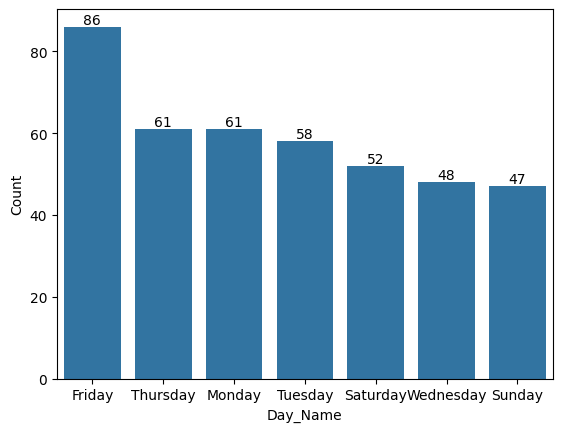

In [ ]:
day_label=df.DAY_Name.value_counts()

x=sns.barplot(x=day_label.index,y=day_label)
for bars in x.containers:
    x.bar_label(bars)
plt.xlabel('Day_Name')
plt.ylabel('Count')
plt.show()

o**bservations:=** So on Friday the most uber rides are booked

Q6.How many miles do people usually book a cab through uber

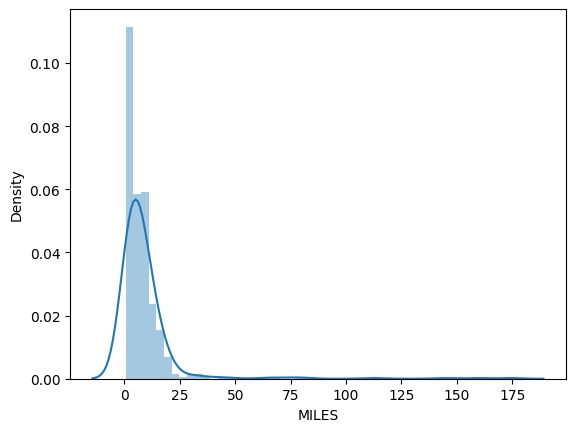

In [ ]:
from pickle import TRUE
sns.distplot(df['MILES'],kde=TRUE)
plt.show()

observation:=so by looking at the distribution most rides are been booked for 0-20 miles distance